In [68]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [69]:
# import csv file
df = pd.read_csv(r"D:\JP CERTIFICATES\IITK\Course summerterm\finlatics\MLResearch\Datasets_ML\Facebook Dataset\Facebook_Marketplace_data.csv")

In [80]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,1
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,1
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [71]:
# dropping the empty files
df = df.drop(columns = ['Column1', 'Column2', 'Column3', 'Column4'])

In [72]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 661.1+ KB


In [74]:
df.describe()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,2016-11-20 05:13:52.672340224,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
min,1.000000,2012-07-15 02:51:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,2016-03-15 16:52:45,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,2017-11-18 01:19:00,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,2018-03-09 05:26:45,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,2018-06-13 01:12:00,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000
std,2035.304031,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812


# ANALYSIS

## Correlation between num_reactions and other engagement metrics

+ finding correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


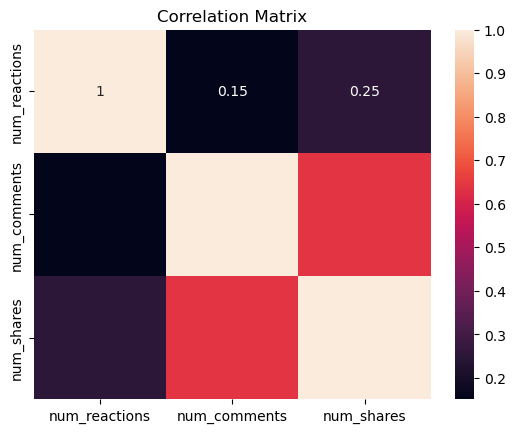

In [82]:
# Calculate correlation matrix
corr_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


## K-Means clustering

+ Using the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


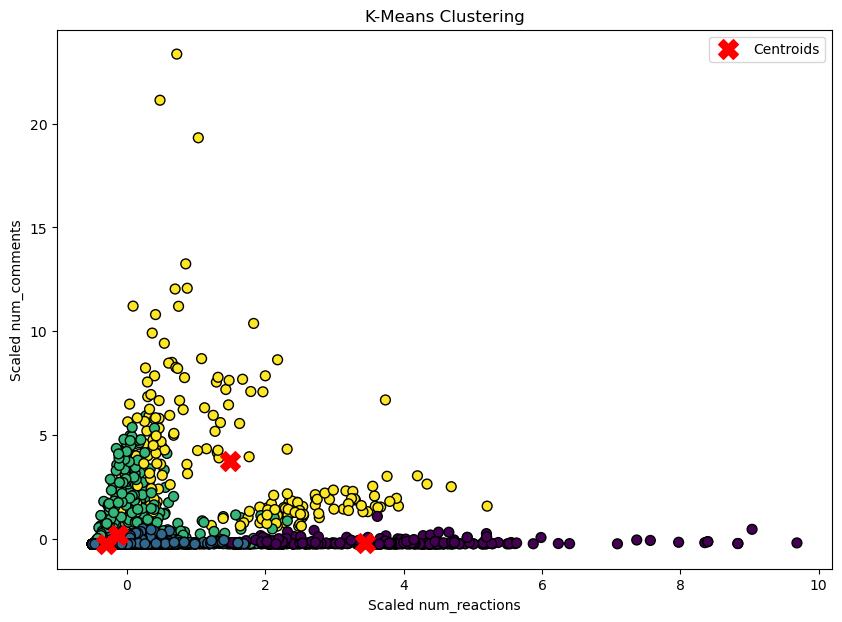

In [76]:
# Select the relevant columns for clustering
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 
            'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# One-hot encode the status_type column since it's categorical
df_encoded = pd.get_dummies(df[features])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Fit the K-Means model
kmeans = KMeans(n_clusters=4, random_state=8)
kmeans.fit(df_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

df['cluster'].value_counts()

# Scatter plot of clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Scaled num_reactions')
plt.ylabel('Scaled num_comments')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


##  Elbow Method

+ Using the elbow method to find the optimum number of clusters.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAYA PRAKASH\anacon

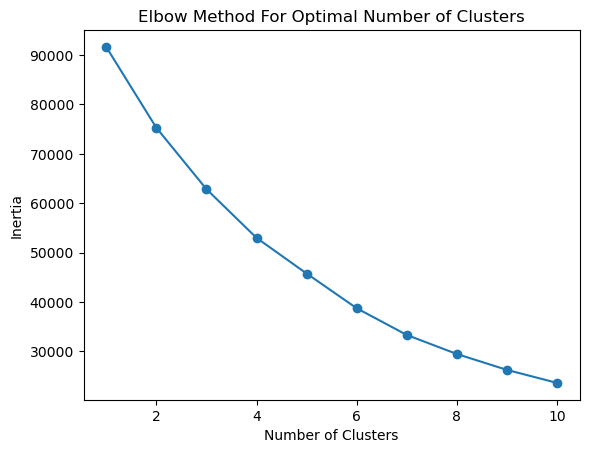

In [77]:
# Determine the optimum number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


## Count of diffrent posts

+ Finding the count of different types of posts in the dataset.

In [78]:
# Count the different types of posts
post_type_counts = df['status_type'].value_counts()
post_type_counts


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

## Average Values for Each Post Type

+ Finding the average value of num_reaction, num_comments, num_shares for each post type.

In [79]:
# Calculate average values for each post type
average_metrics = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
average_metrics


,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,181.290345,15.993470,2.553871
status,438.783562,36.238356,2.558904
video,283.409597,642.478149,115.679949
